In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date


'2017-08-23'

(0.0, 6.7)

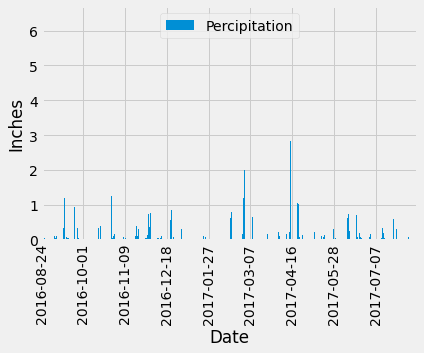

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_dt = dt.datetime.strptime(recent_date, "%Y-%m-%d")
# Calculate the date one year from the last date in data set.
one_yr_earlier = recent_date_dt - relativedelta(months=12)
one_yr_earlier_dt = dt.datetime.strftime(one_yr_earlier,"%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
prcp_scores_query = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > one_yr_earlier_dt).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(prcp_scores_query)
data = data.rename(columns={0:'Date', 1:"Percipitation"})
data = pd.DataFrame.set_index(keys='Date', self=data)


# Sort the dataframe by date
data = pd.DataFrame.sort_index(self=data)

# Use Pandas Plotting with Matplotlib to plot the data
data.plot.bar()
plt.ylabel('Inches')
plt.locator_params(axis='x', nbins=9)
plt.ylim(0,max(data['Percipitation']))
# plt.tight_layout()



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [99]:
# Design a query to calculate the total number stations in the dataset
total_nb_stations = session.query(Station.station).\
    group_by(Station.station).count()
total_nb_stations

9

In [101]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station_counts = session.query(Station.id, Station.station, Station.name).\
    group_by(Station.station).\
    order_by(Station..count()
active_station_counts

SyntaxError: invalid syntax (<ipython-input-101-b45f3bc1e52d>, line 6)

In [100]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations = session.query(Station).\
    filter_by(station='USC00516128').count()

most_active_stations 


1

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()